<a href="https://colab.research.google.com/github/srinivasanibmbangalore/Deep-Learning2/blob/master/MPNeuron_March2020_24March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Based on the tissue sample data, this is a binary classification problem. Classifies as 'Malignant' or 'Benign'
The implementation uses 'MP Neuron' (Mccollough Pit Neuron)nas the Model


In [0]:
import numpy as np
import sklearn.datasets as ds #Very popular dataset
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import accuracy_score


#####Load the Breast Cancer *Dataset*

In [3]:
bc=ds.load_breast_cancer()
type(bc)

sklearn.utils.Bunch

########Explore the breastcancer dataset 

In [4]:
x=bc.data
print(x)
x.shape

y=bc.target
print(bc.target_names)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0

#####Explore the dataset using Pandas

In [5]:
data=pd.data = pd.DataFrame(bc.data,columns=bc.feature_names)
#Add the Class Variable
data['class']=bc.target
data.head() #Print the first 5 records

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [8]:
print(data.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')


In [9]:
print(data['area error'])
data.groupby('class').mean() #Grouped by different class levels and for each class, calculate the mean for each class

0      153.40
1       74.08
2       94.03
3       27.23
4       94.44
        ...  
564    158.70
565     99.04
566     48.55
567     86.22
568     19.15
Name: area error, Length: 569, dtype: float64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


##Splitting the data into test and training set


In [0]:
from sklearn.model_selection import train_test_split

In [11]:
X=data.drop('class', axis=1) # The class label is dropped and stored in a separate array
Y=data['class'] # The class label array is stored separately
Y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
print(Y_train.mean())

0.626953125


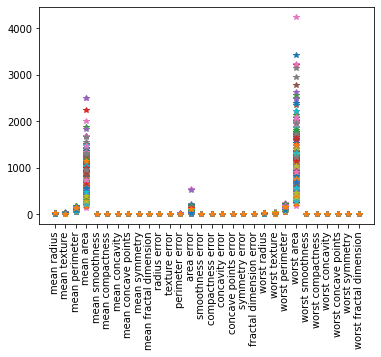

In [13]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

###Binarize the X

In [0]:
X_binarized_train=X_train.apply(pd.cut,bins=2,labels=[1,0]) ### Remember the label values for binning. It needs to be iterated accordingly

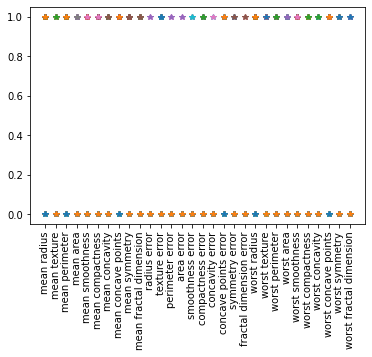

In [15]:
plt.plot(X_binarized_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

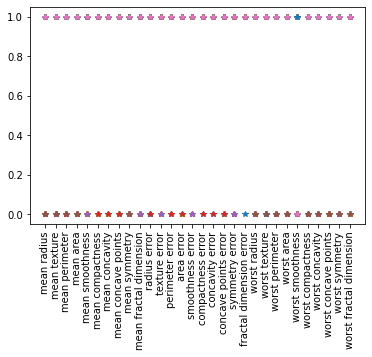

In [80]:
X_binarized_test=X_test.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(X_binarized_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [94]:
type(X_binarized_test)
X_binarized_test_numpy=X_binarized_test.values
X_binarized_train_numpy=X_binarized_train.values
type(X_binarized_train_numpy)

numpy.ndarray

##The model of MP Neuron has a single Parameter 'b'. The objective is to find the right value of b

For a given row, if we were to take the sum of all features (binarized) and if sum were to exceed 'b', then it is considered malignant. Else beningn

#### Trial and Error 1

In [95]:
# Take a random value of b
# Take any row

b=3 # A random value of b

# Random row
i = rn.randint(0,X_binarized_train_numpy.shape[0])

print(Y_train[i])
print(len(X_binarized_train_numpy))
print("i is ",i)

if (np.sum(X_binarized_train_numpy[i,:] > b)):
  rslt = 1
  print("Model detects as Malignant")
else:
  rslt =0
  print("Model detects as Benign")
## compare with the ground truth
print("Ground Truth is " + str(Y_train[i]))
if (Y_train[i] == rslt):
  print("Ground Truth and Model results are same")



1
512
i is  475
Model detects as Benign
Ground Truth is 1


###Trial and Error 2
#### loop the above for every row in X_train_numpy

In [106]:
## The Max Value of 'b' can be 30 since it has only 30 columns (features) and if every value were to be 1
## so we loop on 30

for k in range(X_binarized_train_numpy.shape[1]):
    y_pred_train =[] # An empty array to store the results of prediction
    accurate_rows = 0

    for x, y in zip(X_binarized_train_numpy, Y_train):
      #print(np.sum(x),y)
      y_pred = (np.sum(x) >= k)
      #print(y_pred)
      y_pred_train.append(y_pred)
      if (y_pred == y):
          #print("adding")
          accurate_rows = accurate_rows+1
    print(" k is ", k, "Accuracy is ",accurate_rows/X_binarized_train_numpy.shape[0] )


 k is  0 Accuracy is  0.626953125
 k is  1 Accuracy is  0.626953125
 k is  2 Accuracy is  0.626953125
 k is  3 Accuracy is  0.626953125
 k is  4 Accuracy is  0.626953125
 k is  5 Accuracy is  0.626953125
 k is  6 Accuracy is  0.626953125
 k is  7 Accuracy is  0.626953125
 k is  8 Accuracy is  0.626953125
 k is  9 Accuracy is  0.626953125
 k is  10 Accuracy is  0.626953125
 k is  11 Accuracy is  0.626953125
 k is  12 Accuracy is  0.626953125
 k is  13 Accuracy is  0.626953125
 k is  14 Accuracy is  0.630859375
 k is  15 Accuracy is  0.6328125
 k is  16 Accuracy is  0.642578125
 k is  17 Accuracy is  0.6484375
 k is  18 Accuracy is  0.65625
 k is  19 Accuracy is  0.6640625
 k is  20 Accuracy is  0.671875
 k is  21 Accuracy is  0.6875
 k is  22 Accuracy is  0.701171875
 k is  23 Accuracy is  0.724609375
 k is  24 Accuracy is  0.755859375
 k is  25 Accuracy is  0.78515625
 k is  26 Accuracy is  0.818359375
 k is  27 Accuracy is  0.845703125
 k is  28 Accuracy is  0.849609375
 k is  29 Accu

##### So at b value = 0.8496, the accuracy is highest .
This is the parameter that we were looking at


###Now let us run it on test data and look at accuracy
### b is fixed at 28 (result from the model)

In [111]:
j=28
y_pred_test =[] # An empty array to store the results of prediction on testing data
accurate_rows_test = 0


for m  in X_binarized_test_numpy:
      #print(np.sum(m),n)
      y_pred = (np.sum(m) >= j)
      #print(y_pred)
      y_pred_test.append(y_pred)
accuracy_score_test=accuracy_score(y_pred_test,Y_test)
print("Accuracy score is ",accuracy_score_test)
      

Accuracy score is  0.7894736842105263


So with b=28, on test data, we achieved an accuracy of 0.78
